<a href="https://colab.research.google.com/github/JanhaviGadre/AI-ML/blob/branch1/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Description**
The aim of this project is to refine the given classification model through exploring the dataset and understanding algorithm of RandomForest Classifier and performing hyper parameter tuning, ultimately achieving the highest accuracy.

Dataset Description **bold text**
This is Diabetes dataset. you can use this data set for prediction. in this dataset have many parameters such as Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigree, Age, Outcome.

Outcome = predict whether patient has diabetes(0) or not(1).

Initial Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

%matplotlib inline

Loading the Dataset
For implementation change the path to your local directory where dataset is stored, but before uploading make sure you change it to the default path.

In [3]:
file_path = '<localpath>/AI-ML/data/diabetes.csv'
#file_path = '/content/diabetes.csv'
data = pd.read_csv(file_path)
y = data.Outcome


Exploratory Data Analysis


Missing Value Check & Fix

Correlation Check

In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


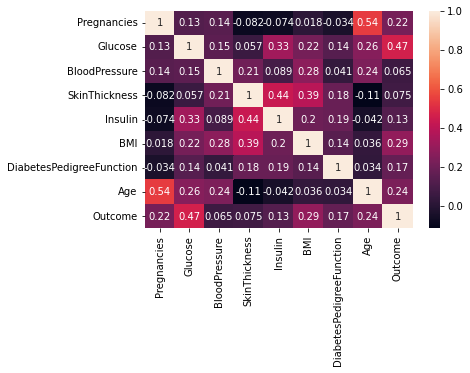

In [5]:
corrmat=data.corr()
sns.heatmap(corrmat, annot=True)

Variance Check

In [10]:
data.var()

Pregnancies                    11.354056
Glucose                      1022.248314
BloodPressure                 374.647271
SkinThickness                 254.473245
Insulin                     13281.180078
BMI                            62.159984
DiabetesPedigreeFunction        0.109779
Age                           138.303046
Outcome                         0.227483
dtype: float64

In [11]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(data.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

Visual Exploration

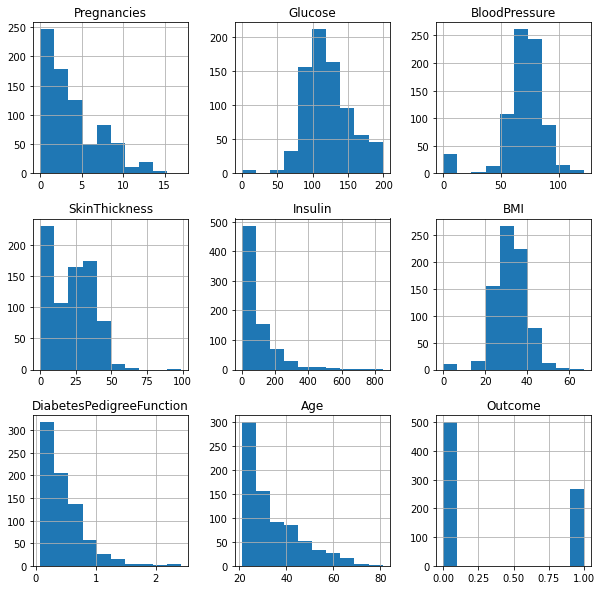

In [6]:
data.hist(bins=10,figsize=(10,10))
plt.show()

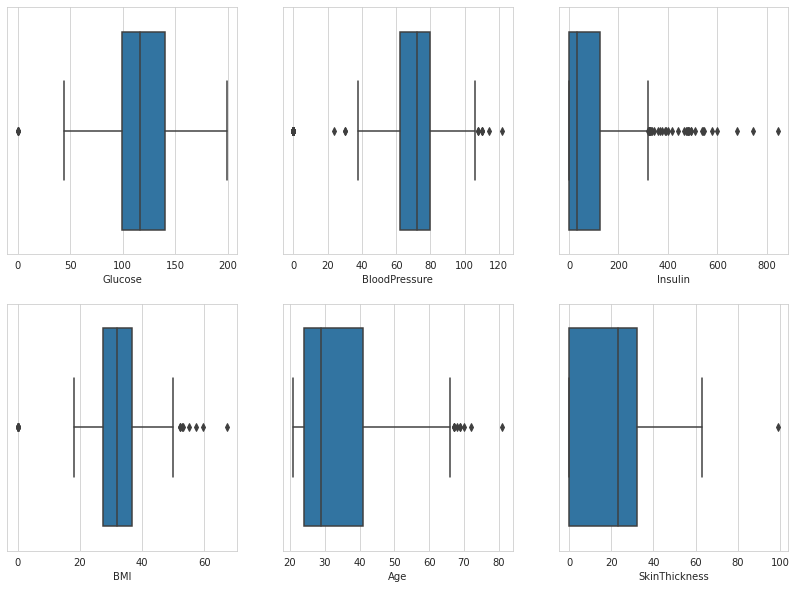

In [7]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Glucose',data=data)
plt.subplot(2,3,2)
sns.boxplot(x='BloodPressure',data=data)
plt.subplot(2,3,3)
sns.boxplot(x='Insulin',data=data)
plt.subplot(2,3,4)
sns.boxplot(x='BMI',data=data)
plt.subplot(2,3,5)
sns.boxplot(x='Age',data=data)
plt.subplot(2,3,6)
sns.boxplot(x='SkinThickness',data=data)

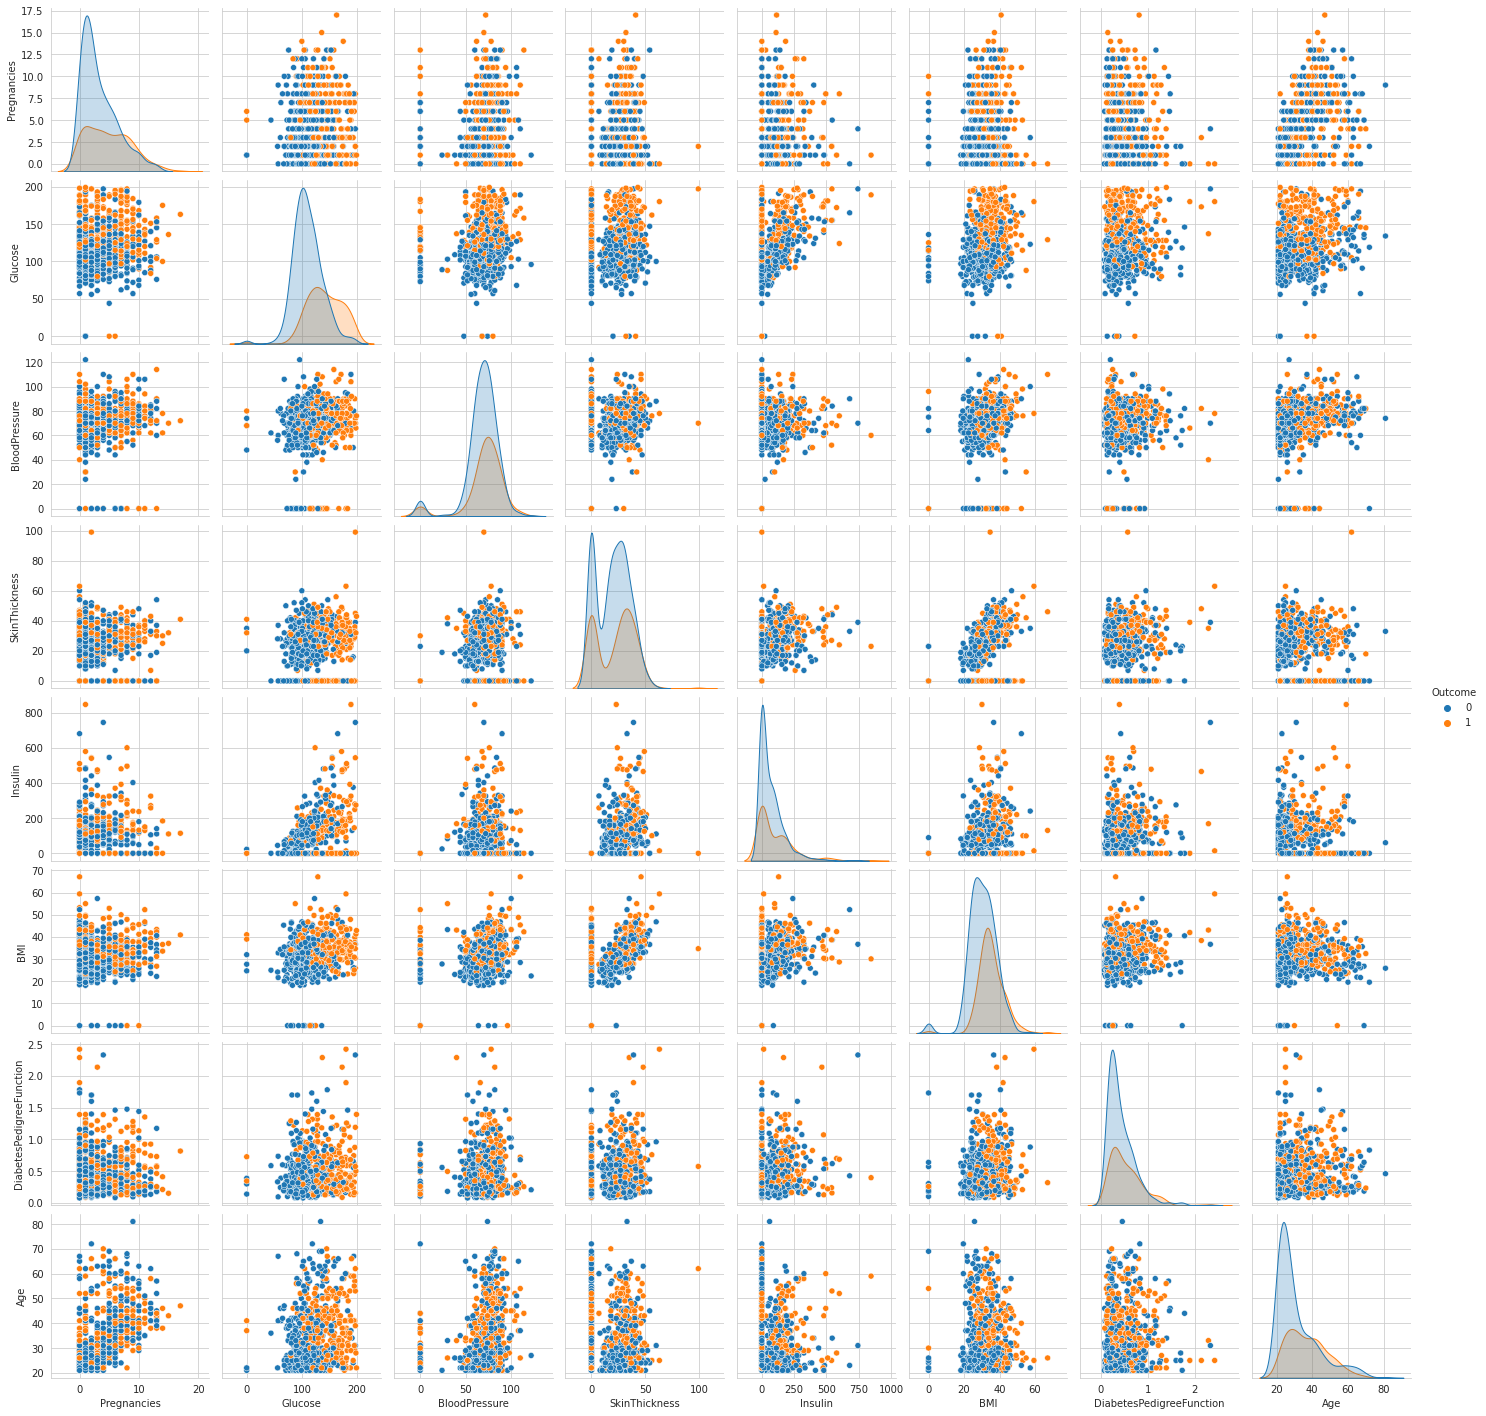

In [8]:
sns.pairplot(data,hue='Outcome')